## Setup

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

## Data Exploration

In [4]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00


In [5]:
import tensorflow_datasets as tfds

In [6]:
dataset = tfds.load('huggingface:amazon_reviews_multi/all_languages', split='train', shuffle_files= True)

/usr/local/lib/python3.10/dist-packages/tensorflow_datasets/core/dataset_builders/huggingface_dataset_builder.py:156: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  hf_names = hf_datasets.list_datasets()


Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/amazon_reviews_multi/all_languages/1.0.0.incompleteLMHETK/amazon_reviews_m…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/amazon_reviews_multi/all_languages/1.0.0.incompleteLMHETK/amazon_reviews_m…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/amazon_reviews_multi/all_languages/1.0.0.incompleteLMHETK/amazon_reviews_m…

Dataset amazon_reviews_multi downloaded and prepared to /root/tensorflow_datasets/amazon_reviews_multi/all_languages/1.0.0. Subsequent calls will reuse this data.


In [38]:
dataset_sub = dataset.take(120000)
df = tfds.as_dataframe(dataset_sub)

In [39]:
df.head(10)

,language,product_category,product_id,review_body,review_id,review_title,reviewer_id,stars
0,b'zh',b'book',b'product_zh_0686298',b'\xe4\xb8\x8d\xe6\x98\xaf\xe8\xaf\xb4\xe8\xa6...,b'zh_0072036',b'\xe4\xb8\x80\xe8\x88\xac\xe8\x88\xac',b'reviewer_zh_0189018',1
1,b'en',b'drugstore',b'product_en_0427643',"b""It\xe2\x80\x99s exactly what I needed, easy ...",b'en_0152529',b'It\xe2\x80\x99s exactly what I needed',b'reviewer_en_0377351',5
2,b'fr',b'pc',b'product_fr_0612661',b'La connexion est dure ! \xc3\x80 manipuler a...,b'fr_0696655',b'Moyen',b'reviewer_fr_0491504',3
3,b'en',b'automotive',b'product_en_0470737',b'I have to say that I like the quality of thi...,b'en_0036949',b'Nice but won\xe2\x80\x99t stay on car.',b'reviewer_en_0832136',3
4,b'es',b'drugstore',b'product_es_0050448',"b'Est\xc3\xa1 muy bien, aunque el aroma es muy...",b'es_0732372',b'Muy dulce y con poco aroma a champagne....',b'reviewer_es_0932448',3
5,b'es',b'home',b'product_es_0736949',b'El \xc3\xbanico inconveniente que he encontr...,b'es_0265565',b'Pr\xc3\xa1ctico pero dif\xc3\xadcil de montar.',b'reviewer_es_0030950',4
6,b'en',b'office_product',b'product_en_0400084',"b""Product seems all right, but the Allen wrenc...",b'en_0406650',"b'""Adjustable"" if the screwdriver fit'",b'reviewer_en_0746910',4
7,b'de',b'electronics',b'product_de_0812620',b'Die Lieferung erfolgte p\xc3\xbcnktlich und ...,b'de_0407283',b'Alles bestens....',b'reviewer_de_0031285',5
8,b'de',b'home_improvement',b'product_de_0019907',b'positiv: - die Einbindung in Z-Wave-Netzwerk...,b'de_0808003',"b'Problemlos zu installieren, mit Messfunktion...",b'reviewer_de_0606018',4
9,b'fr',b'jewelry',b'product_fr_0159489',"b""Tr\xc3\xa8s jolie, malheureusement difficile...",b'fr_0404002',b'Jolie mais pas pratique',b'reviewer_fr_0043063',3


In [40]:
# I am not going to work with japan or zh language for this project
filtered_df = df[df['language'] != b'ja']
filtered_df = filtered_df[filtered_df['language'] != b'zh']
filtered_df.reset_index(drop=True, inplace=True)

In [41]:
filtered_df['review_body'] = filtered_df['review_body'].str.decode('utf-8')

In [42]:
def remove_emojis(text):
    if not isinstance(text, str):
        text = str(text)

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001FB00-\U0001FBFF"  # Symbols for Legacy Computing
                               u"\U0001F004-\U0001F0CF"  # Miscellaneous Symbols and Arrows
                               u"\U0001F170-\U0001F251"  # Enclosed Alphanumeric Supplement
                               "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)


filtered_df['review_body'] = filtered_df['review_body'].apply(remove_emojis)
filtered_df['review_body'] = filtered_df['review_body'].apply(remove_punctuation)

In [43]:
filtered_df.head(10)

,language,product_category,product_id,review_body,review_id,review_title,reviewer_id,stars
0,b'en',b'drugstore',b'product_en_0427643',Its exactly what I needed easy to cut and put ...,b'en_0152529',b'It\xe2\x80\x99s exactly what I needed',b'reviewer_en_0377351',5
1,b'fr',b'pc',b'product_fr_0612661',La connexion est dure À manipuler avec précau...,b'fr_0696655',b'Moyen',b'reviewer_fr_0491504',3
2,b'en',b'automotive',b'product_en_0470737',I have to say that I like the quality of this ...,b'en_0036949',b'Nice but won\xe2\x80\x99t stay on car.',b'reviewer_en_0832136',3
3,b'es',b'drugstore',b'product_es_0050448',Está muy bien aunque el aroma es muy dulce hue...,b'es_0732372',b'Muy dulce y con poco aroma a champagne....',b'reviewer_es_0932448',3
4,b'es',b'home',b'product_es_0736949',El único inconveniente que he encontrado ha si...,b'es_0265565',b'Pr\xc3\xa1ctico pero dif\xc3\xadcil de montar.',b'reviewer_es_0030950',4
5,b'en',b'office_product',b'product_en_0400084',Product seems all right but the Allen wrench t...,b'en_0406650',"b'""Adjustable"" if the screwdriver fit'",b'reviewer_en_0746910',4
6,b'de',b'electronics',b'product_de_0812620',Die Lieferung erfolgte pünktlich und alles war...,b'de_0407283',b'Alles bestens....',b'reviewer_de_0031285',5
7,b'de',b'home_improvement',b'product_de_0019907',positiv die Einbindung in ZWaveNetzwerk funkt...,b'de_0808003',"b'Problemlos zu installieren, mit Messfunktion...",b'reviewer_de_0606018',4
8,b'fr',b'jewelry',b'product_fr_0159489',Très jolie malheureusement difficile à mettre ...,b'fr_0404002',b'Jolie mais pas pratique',b'reviewer_fr_0043063',3
9,b'en',b'kitchen',b'product_en_0687202',The filters are not good replacements for the ...,b'en_0996340',b'Bad filters. Hopefully the tabs are better.',b'reviewer_en_0744410',2


In [44]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80054 entries, 0 to 80053
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          80054 non-null  object
 1   product_category  80054 non-null  object
 2   product_id        80054 non-null  object
 3   review_body       80054 non-null  object
 4   review_id         80054 non-null  object
 5   review_title      80054 non-null  object
 6   reviewer_id       80054 non-null  object
 7   stars             80054 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 4.6+ MB


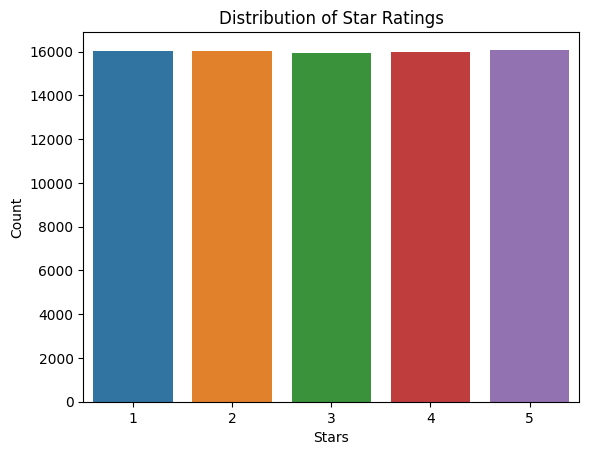

In [45]:
ratings = filtered_df['stars'].value_counts().sort_index()

sns.barplot(x=ratings.index, y=ratings.values)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Distribution of Star Ratings')

plt.show()

Classes are well balanced for this subdataset

In [46]:
print(filtered_df['review_body'][2])
print(filtered_df['stars'][2])

I have to say that I like the quality of this cover But it has blown off my car three times during storms Each time I resecure it I live in Florida and we have had some strong storms but I think they need more straps to keep it on car
3


In [47]:
reviews= filtered_df['review_body'].values.tolist()
score = filtered_df['stars'].tolist()

In [48]:
from sklearn.model_selection import train_test_split
train_review,val_review,train_score,val_score= train_test_split(reviews,score,test_size=0.2)

In [49]:
len(train_review)

64043

In [50]:
print(train_review[1])
print(train_score[1])

Keine woche alt erster Reißverschluss kaputt raus gesprungen Keine 3 wochen der nächste somit konnte ich den Rucksack nicht mehr verschließen Und das bei dem preis Sehr schlecht
1


In [51]:
tokenizer_sentiment = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model_sentiment = TFAutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [52]:
batch_size = 10000
tokenized_train= []

# Tokenize your data in batches
for i in range(0, len(train_review), batch_size):
    print(i)
    batch_reviews = train_review[i:i + batch_size]
    batch_encodings = tokenizer_sentiment(batch_reviews,truncation=True,padding=True, return_tensors='tf',max_length=128)
    tokenized_train.append(batch_encodings)

# Concatenate the tokenized encodings into a single tensor
train_encodings = {key: tf.concat([batch[key] for batch in tokenized_train], axis=0) for key in tokenized_train[0].keys()}

0
10000
20000
30000
40000
50000
60000


In [53]:
len(val_review)

16011

In [54]:
batch_size = 10000
tokenized_val = []

# Tokenize your data in batches
for i in range(0, len(val_review), batch_size):
    print(i)
    batch_reviews = val_review[i:i + batch_size]
    batch_encodings = tokenizer_sentiment(batch_reviews, truncation=True,padding=True, return_tensors='tf',max_length=128)
    tokenized_val.append(batch_encodings)

# Concatenate the tokenized encodings into a single tensor
val_encodings = {key: tf.concat([batch[key] for batch in tokenized_val], axis=0) for key in tokenized_val[0].keys()}

0
10000


In [55]:
# Convert train_score and val_score to NumPy arrays
train_score = np.array(train_score)
val_score = np.array(val_score)

# Define the training parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile the pre-trained model for fine-tuning
model_sentiment.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Fine-tune the pre-trained model
history = model_sentiment.fit(
    [train_encodings['input_ids'], train_encodings['attention_mask']],
    train_score-1,
    validation_data=([val_encodings['input_ids'], val_encodings['attention_mask']], val_score-1),
    epochs=5,
    batch_size=32
)

Epoch 1/5
2002/2002 [==============================] - 1814s 878ms/step - loss: 1.0736 - accuracy: 0.5266 - val_loss: 1.0308 - val_accuracy: 0.5451
Epoch 2/5
2002/2002 [==============================] - 1758s 878ms/step - loss: 0.9705 - accuracy: 0.5762 - val_loss: 1.0437 - val_accuracy: 0.5457
Epoch 3/5
2002/2002 [==============================] - 1757s 878ms/step - loss: 0.8771 - accuracy: 0.6189 - val_loss: 1.0944 - val_accuracy: 0.5449
Epoch 4/5
2002/2002 [==============================] - 1757s 878ms/step - loss: 0.7800 - accuracy: 0.6649 - val_loss: 1.0717 - val_accuracy: 0.5436
Epoch 5/5
2002/2002 [==============================] - 1755s 877ms/step - loss: 0.6741 - accuracy: 0.7159 - val_loss: 1.1899 - val_accuracy: 0.5374


In [56]:
val_loss, val_accuracy = model_sentiment.evaluate([val_encodings['input_ids'], val_encodings['attention_mask']], val_score - 1)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


501/501 [==============================] - 143s 285ms/step - loss: 1.1899 - accuracy: 0.5374
Validation Loss: 1.1899, Validation Accuracy: 0.5374


In [57]:
#Saving the model
from google.colab import drive
drive.mount('/content/drive')
model_sentiment.save('/content/drive/MyDrive')

Mounted at /content/drive


In [62]:
#function to test the model later on random reviews
def sentiment_score(review):
  tokens = tokenizer_sentiment(review, truncation=True,padding=True, return_tensors='tf',max_length=128)
  result=model_sentiment(tokens)
  return tf.argmax(result.logits, axis=1).numpy()[0]+1

In [63]:
sentiment_score(train_review[1])

1

In [64]:
sentiment_score("i don't like this, it is awful")

1

In [65]:
sentiment_score("i love this product, it helped me a lot")

5

In [66]:
sentiment_score("good but could be better")

3

In [67]:
sentiment_score("Short battery life")

2

In [68]:
sentiment_score("Movie is good but the cast isn't the best choice")

4